# Classifying Urban sounds using Deep Learning

## 3 Model Training and Evaluation 

### Load Preprocessed data 

In [1]:
# retrieve the preprocessed data from previous notebook

# %store -r x_train 
# %store -r x_test 
# %store -r y_train 
# %store -r y_test 
# %store -r yy 
# %store -r le

In [1]:
def add_noise(data,x):
    noise = np.random.randn(len(data))
    data_noise = data + x * noise
    return data_noise

def shift(data,x):
    return np.roll(data, x)

def stretch(data, rate):
    data = librosa.effects.time_stretch(data, rate)
    return data

In [3]:
import numpy as np
import librosa
import os
X_=[]
y_=[]
dir_= './clinical/converted_seg/cneg/'
p='negative'
for soundDir in (os.listdir(dir_)):
    data_x, sampling_rate = librosa.load(dir_+soundDir,res_type='kaiser_fast')
    mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=40).T,axis=0) 
    X_.append(mfccs)
    y_.append('negative')

    data_noise = add_noise(data_x,0.005)
    mfccs_noise = np.mean(librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=40).T,axis=0) 
    X_.append(mfccs_noise)
    y_.append(p)

    data_shift = shift(data_x,1600)
    mfccs_shift = np.mean(librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=40).T,axis=0) 
    X_.append(mfccs_shift)
    y_.append(p)

    data_stretch = stretch(data_x,1.2)
    mfccs_stretch = np.mean(librosa.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=40).T,axis=0) 
    X_.append(mfccs_stretch)
    y_.append(p)

    data_stretch_2 = stretch(data_x,0.8)
    mfccs_stretch_2 = np.mean(librosa.feature.mfcc(y=data_stretch_2, sr=sampling_rate, n_mfcc=40).T,axis=0) 
    X_.append(mfccs_stretch_2)
    y_.append(p)

In [4]:
import numpy as np
import librosa
import os

dir_= './clinical/converted_seg/cpos/'
p='positive'
for soundDir in (os.listdir(dir_)):
    data_x, sampling_rate = librosa.load(dir_+soundDir,res_type='kaiser_fast')
    mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=40).T,axis=0) 
    X_.append(mfccs)
    y_.append('positive')

    data_noise = add_noise(data_x,0.005)
    mfccs_noise = np.mean(librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=40).T,axis=0) 
    X_.append(mfccs_noise)
    y_.append(p)

    data_shift = shift(data_x,1600)
    mfccs_shift = np.mean(librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=40).T,axis=0) 
    X_.append(mfccs_shift)
    y_.append(p)

    data_stretch = stretch(data_x,1.2)
    mfccs_stretch = np.mean(librosa.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=40).T,axis=0) 
    X_.append(mfccs_stretch)
    y_.append(p)

    data_stretch_2 = stretch(data_x,0.8)
    mfccs_stretch_2 = np.mean(librosa.feature.mfcc(y=data_stretch_2, sr=sampling_rate, n_mfcc=40).T,axis=0) 
    X_.append(mfccs_stretch_2)
    y_.append(p)

In [5]:
X = np.array(X_)
y = np.array(y_)

In [6]:
print(X)
print(y)

[[-5.10094818e+02  3.20862427e+01 -1.48833714e+01 ...  3.81080687e-01
   3.74728590e-01  1.38507652e+00]
 [-2.69644516e+02  1.59614408e+01 -4.85760469e+00 ...  8.94178798e-01
   4.90179794e-01  1.64928549e+00]
 [-5.08641235e+02  3.45660172e+01 -1.65387192e+01 ...  3.78286183e-01
   2.82604098e-01  1.48085976e+00]
 ...
 [-3.49824341e+02  5.46507072e+01 -4.65615921e+01 ... -8.15696359e-01
  -1.11679304e+00 -2.90427953e-01]
 [-3.64710724e+02  5.27145729e+01 -4.16428795e+01 ... -1.20872974e+00
  -1.72089839e+00 -1.17781043e+00]
 [-3.71380310e+02  5.08207207e+01 -4.21386871e+01 ... -1.21099401e+00
  -1.07187545e+00 -2.70886362e-01]]
['negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negat

In [10]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
# X = np.array(featuresdf.feature.tolist())
# y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 
print(yy)


[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [11]:
# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.3, random_state = 42)

### Initial model architecture - MLP

We will start with constructing a Multilayer Perceptron (MLP) Neural Network using Keras and a Tensorflow backend. 

Starting with a `sequential` model so we can build the model layer by layer. 

We will begin with a simple model architecture, consisting of three layers, an input layer, a hidden layer and an output layer. All three layers will be of the `dense` layer type which is a standard layer type that is used in many cases for neural networks. 

The first layer will receive the input shape. As each sample contains 40 MFCCs (or columns) we have a shape of (1x40) this means we will start with an input shape of 40. 

The first two layers will have 256 nodes. The activation function we will be using for our first 2 layers is the `ReLU`, or `Rectified Linear Activation`. This activation function has been proven to work well in neural networks.

We will also apply a `Dropout` value of 50% on our first two layers. This will randomly exclude nodes from each update cycle which in turn results in a network that is capable of better generalisation and is less likely to overfit the training data.

Our output layer will have 2 nodes (num_labels) which matches the number of possible classifications. The activation is for our output layer is `softmax`. Softmax makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has the highest probability.

In [12]:
print(yy.shape[1])

2


In [13]:
print(x_test.shape[0])

182


In [15]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 


num_labels = yy.shape[1]
filter_size = 2


# Construct model 
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(Dense(num_labels))
model.add(Activation('softmax'))



### Compiling the model 

For compiling our model, we will use the following three parameters: 

* Loss function - we will use `categorical_crossentropy`. This is the most common choice for classification. A lower score indicates that the model is performing better.

* Metrics - we will use the `accuracy` metric which will allow us to view the accuracy score on the validation data when we train the model. 

* Optimizer - here we will use `adam` which is a generally good optimizer for many use cases.


In [16]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

In [17]:
# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               10496     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8

### Training 

Here we will train the model. 

We will start with 100 epochs which is the number of times the model will cycle through the data. The model will improve on each cycle until it reaches a certain point. 

We will also start with a low batch size, as having a large batch size can reduce the generalisation ability of the model. 

In [18]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 130
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_mlp.h5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/130
 1/14 [=>............................] - ETA: 6s - loss: 13.9904 - accuracy: 0.5000
Epoch 00001: val_loss improved from inf to 3.63762, saving model to saved_models\weights.best.basic_mlp.h5
14/14 [==============================] - 1s 8ms/step - loss: 12.0757 - accuracy: 0.5603 - val_loss: 3.6376 - val_accuracy: 0.6703
Epoch 2/130
 1/14 [=>............................] - ETA: 0s - loss: 4.5776 - accuracy: 0.6250
Epoch 00002: val_loss improved from 3.63762 to 0.56254, saving model to saved_models\weights.best.basic_mlp.h5
14/14 [==============================] - 0s 6ms/step - loss: 6.0992 - accuracy: 0.5177 - val_loss: 0.5625 - val_accuracy: 0.7418
Epoch 3/130
 1/14 [=>............................] - ETA: 0s - loss: 5.1863 - accuracy: 0.4062
Epoch 00003: val_loss did not improve from 0.56254
14/14 [==============================] - 0s 4ms/step - loss: 3.6387 - accuracy: 0.4941 - val_loss: 0.6084 - val_accuracy: 0.7033
Epoch 4/130
 1/14 [=>............................] - ETA:

### Test the model 

Here we will review the accuracy of the model on both the training and test data sets. 

In [19]:
model.save('saved_models/mlp_ka_sapna')

INFO:tensorflow:Assets written to: saved_models/mlp_ka_sapna\assets


In [20]:
# Evaluating the model on the training and testing set
model.save('saved_models/mlp_ka_sapna')

training_accuracy = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", training_accuracy[1])

testing_accuracy = model.evaluate(x_test, y_test, verbose=0)

print("Testing Accuracy: ", testing_accuracy[1])

INFO:tensorflow:Assets written to: saved_models/mlp_ka_sapna\assets
Training Accuracy:  0.9550827145576477
Testing Accuracy:  0.9505494236946106


The initial Training and Testing accuracy scores are quite high. As there is not a great difference between the Training and Test scores (~5%) this suggests that the model has not suffered from overfitting. 

In [23]:
#predicted_vector = model.predict(x_test)
predict_x=model.predict(x_test) 
predicted_vector=np.argmax(predict_x,axis=1)
le = LabelEncoder()
yy_pred = to_categorical(le.fit_transform(predicted_vector)) 
# print(yy_pred)

Normalized confusion matrix
[[0.98 0.02]
 [0.12 0.88]]


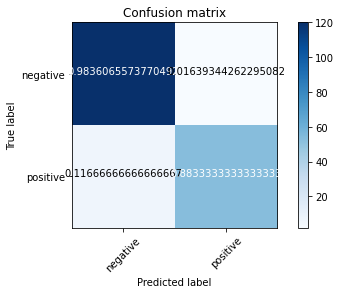

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    np.set_printoptions(precision=2)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cnf_matrix=confusion_matrix(y_test.argmax(axis=1),yy_pred.argmax(axis=1))
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, ['negative','positive'],
                      'Confusion matrix, without normalization')
plt.show()




In [25]:
print(classification_report(yy_pred.argmax(axis=1),y_test.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       127
           1       0.88      0.96      0.92        55

    accuracy                           0.95       182
   macro avg       0.93      0.95      0.94       182
weighted avg       0.95      0.95      0.95       182



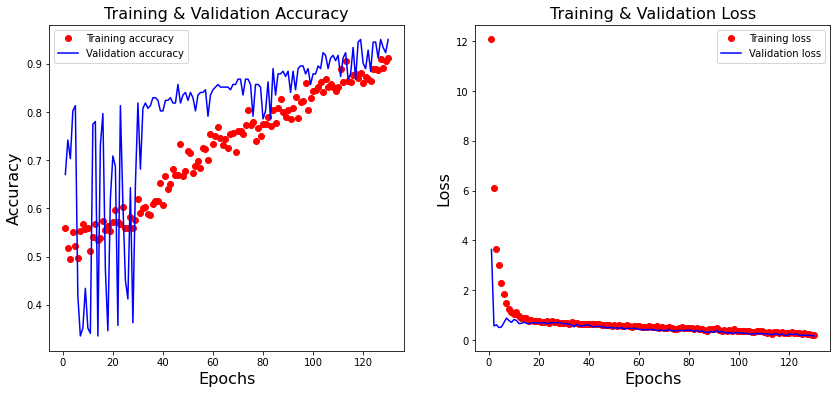

In [26]:
import matplotlib.pyplot as plt
 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'ro', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'ro', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

### Predictions  

Here we will build a method which will allow us to test the models predictions on a specified audio .wav file. 

In [27]:
import librosa 
import numpy as np 

def extract_feature(file_name):
   
    try:
        audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None, None

    return np.array([mfccsscaled])


In [62]:
def print_prediction(file_name):
    prediction_feature = extract_feature(file_name) 

    #predicted_vector = model.predict_classes(prediction_feature)
    predict_x=model.predict(prediction_feature) 
    predicted_vector=np.argmax(predict_x,axis=1)
    predicted_class = le.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = model.predict(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

### Validation 

#### Test with sample data 

Initial sainity check to verify the predictions using a subsection of the sample audio files we explored in the first notebook. We expect the bulk of these to be classified correctly. 

In [63]:
# Class: neg

filename = './clinical/converted/neg/neg-0421-088-cough-f-66.wav' 
print_prediction(filename) 

The predicted class is: 0 

0 		 :  0.99303036928176879882812500000000
1 		 :  0.00696968426927924156188964843750


In [61]:
# Class: positive

filename = './clinical/converted/pos/pos-0421-094-cough-m-51.wav'
print_prediction(filename) 

The predicted class is: 1 

0 		 :  0.00875048246234655380249023437500
1 		 :  0.99124956130981445312500000000000


In [36]:
# # Class: Street music 

# filename = '../UrbanSound Dataset sample/audio/101848-9-0-0.wav'
# print_prediction(filename) 

In [37]:
#  Class: Car Horn 

# filename = '../UrbanSound Dataset sample/audio/100648-1-0-0.wav'
# print_prediction(filename) 

#### Observations 

From this brief sanity check the model seems to predict well. One errror was observed whereby a car horn was incorrectly classifed as a dog bark. 

We can see from the per class confidence that this was quite a low score (43%). This allows follows our early observation that a dog bark and car horn are similar in spectral shape. 

### Other audio

Here we will use a sample of various copyright free sounds that we not part of either our test or training data to further validate our model. 

In [64]:
#filename = '../Evaluation audio/pos/az5zELVN7ObicxGrBLMoX8ki1LF2_shallow_1.wav'
#print_prediction(filename) 

In [65]:
filename = '../Evaluation audio/Tanya(20-4-2021).wav'

print_prediction(filename) 

The predicted class is: 0 

0 		 :  0.90905565023422241210937500000000
1 		 :  0.09094434231519699096679687500000


In [66]:
#filename = '../Evaluation audio/pos/Fi2lLmV3LHR5brvXs0z1JSKDvnI2_heavy_1.wav'

#print_prediction(filename) 

# sample data weighted towards gun shot - peak in the dog barking sample is simmilar in shape to the gun shot sample

In [67]:
#filename = '../Evaluation audio/neg/0zAgZhOXaGhmL1SnhkzJOIoowKg2_heavy_1.wav'

#print_prediction(filename) 

In [68]:
filename = '../Evaluation audio/Ghaziabad.wav'

print_prediction(filename) 

The predicted class is: 0 

0 		 :  0.92866593599319458007812500000000
1 		 :  0.07133407145738601684570312500000


In [69]:
filename = '../Evaluation audio/coughtest2.wav'

print_prediction(filename) 

The predicted class is: 0 

0 		 :  0.82455629110336303710937500000000
1 		 :  0.17544366419315338134765625000000


In [70]:

#filename = '../Evaluation audio/neg/zBiORuLmvGhOciaUXFeAKRhMyhj2_heavy_5.wav'

#print_prediction(filename) 

In [71]:
filename = '../Evaluation audio/Divyam.wav'

print_prediction(filename) 

The predicted class is: 1 

0 		 :  0.12461473792791366577148437500000
1 		 :  0.87538528442382812500000000000000


In [72]:
filename = '../Evaluation audio/DJ(03-05-21).wav'

print_prediction(filename) 

The predicted class is: 0 

0 		 :  0.82465344667434692382812500000000
1 		 :  0.17534659802913665771484375000000


In [73]:
filename = '../Evaluation audio/DJ2.wav'

print_prediction(filename) 

The predicted class is: 0 

0 		 :  0.85730642080307006835937500000000
1 		 :  0.14269351959228515625000000000000


In [74]:
filename = '../Evaluation audio/DJ3.wav'

print_prediction(filename) 

The predicted class is: 1 

0 		 :  0.14283017814159393310546875000000
1 		 :  0.85716974735260009765625000000000


In [75]:
filename = '../Evaluation audio/Vardhika(03-05-21).wav'

print_prediction(filename) 

The predicted class is: 0 

0 		 :  0.99734133481979370117187500000000
1 		 :  0.00265863956883549690246582031250


In [76]:
filename = '../Evaluation audio/Tanyas_Grandma(29-4-2021).wav'

print_prediction(filename) 

The predicted class is: 1 

0 		 :  0.19803266227245330810546875000000
1 		 :  0.80196732282638549804687500000000


In [77]:
filename = '../Evaluation audio/Mom(29-4-2021).wav'

print_prediction(filename) 


The predicted class is: 0 

0 		 :  0.77881205081939697265625000000000
1 		 :  0.22118791937828063964843750000000


In [78]:
filename = '../Evaluation audio/Avi(29-4-2021).wav'

print_prediction(filename) 

The predicted class is: 0 

0 		 :  0.85706651210784912109375000000000
1 		 :  0.14293350279331207275390625000000


In [79]:
filename = '../Evaluation audio/Bhaiya(04-05-21).wav'

print_prediction(filename) 

The predicted class is: 0 

0 		 :  0.88225281238555908203125000000000
1 		 :  0.11774717271327972412109375000000


In [80]:
filename = '../Evaluation audio/Papa(29-4-2021).wav'

print_prediction(filename) 

The predicted class is: 1 

0 		 :  0.46860334277153015136718750000000
1 		 :  0.53139662742614746093750000000000


In [81]:
filename = '../Evaluation audio/Shreya2(08-05-21).wav'

print_prediction(filename) 

The predicted class is: 0 

0 		 :  0.90370321273803710937500000000000
1 		 :  0.09629682451486587524414062500000


In [82]:
filename = '../Evaluation audio/Satyashree3(08-05-21).wav'

print_prediction(filename) 

The predicted class is: 0 

0 		 :  0.67805248498916625976562500000000
1 		 :  0.32194754481315612792968750000000


#### Observations 

The performance of our initial model is satisfactorry and has generalised well, seeming to predict well when tested against new audio data. 

### *In the next notebook we will refine our model*